# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [4]:
city_info = get_city_info(coordination_source)

In [5]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#中文显示

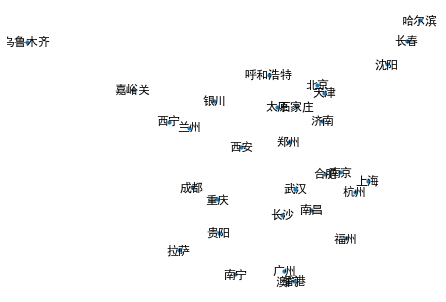

In [7]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))
nx.draw(city_graph, city_info, with_labels=True, node_size=10) #画位置

In [8]:
import math

def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [9]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance("杭州","上海")

153.5185697155768

In [10]:
threshold = 700   # defined the threshold

In [11]:
from collections import defaultdict

In [12]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)

In [13]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

/Users/orange/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


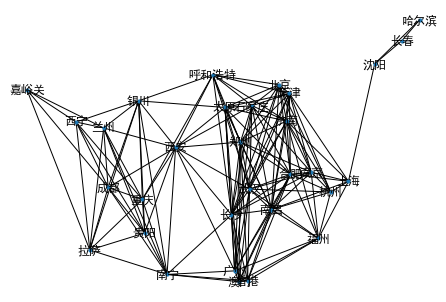

In [14]:
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10) #画线

In [15]:
from sklearn.datasets import load_boston
import random

In [16]:
dataset = load_boston()

In [17]:
x,y=dataset['data'],dataset['target']

In [18]:
x.shape

(506, 13)

In [19]:
x[1].shape
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [20]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
X_rm = x[:,5]

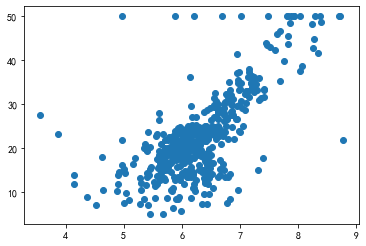

In [22]:
plt.scatter(X_rm,y)  #scatter散点图

In [23]:
def price(rm, k, b):
    return k * rm + b

In [24]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y)) 
#zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表

In [25]:
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [26]:
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 311131.00949771726, parameters k is 82.66527386916204 and b is 58.368578259243634
Iteration 1, the loss is 262242.59607471945, parameters k is 75.61235661145622 and b is 57.25786466977739
Iteration 2, the loss is 221039.08118438735, parameters k is 69.13748300656208 and b is 56.23802252014793
Iteration 3, the loss is 186312.45528325692, parameters k is 63.19327971639921 and b is 55.301604481439874
Iteration 4, the loss is 157044.59904579312, parameters k is 57.736255865953666 and b is 54.441773567614774
Iteration 5, the loss is 132377.43401836528, parameters k is 52.72648485756267 and b is 53.65225311510354
Iteration 6, the loss is 111587.76537093875, parameters k is 48.12731226198296 and b is 52.92728086180151
Iteration 7, the loss is 94066.07918322248, parameters k is 43.90508764913042 and b is 52.26156678950118
Iteration 8, the loss is 79298.6726415363, parameters k is 40.02891839652465 and b is 51.65025442133156
Iteration 9, the loss is 66852.59323733459, p

Iteration 197, the loss is 120.75540515696242, parameters k is -3.3381469355370044 and b is 44.463342294127166
Iteration 198, the loss is 120.75169448101693, parameters k is -3.337848122686555 and b is 44.46143928822935
Iteration 199, the loss is 120.74798398354986, parameters k is -3.3375492890916374 and b is 44.4595363324843


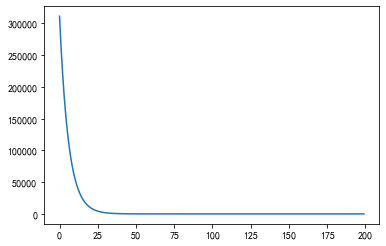

In [27]:
plt.plot(list(range(iteration_num)),losses)

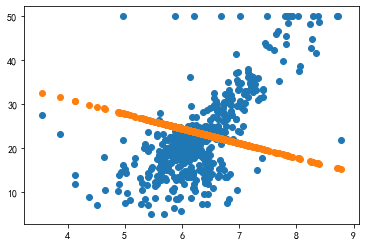

In [28]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

In [34]:
两个点的cost>=0

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

In [ ]:
最优性剪枝。如果当前步数已超过当前最优解，就减去这一支后面的搜索。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

In [ ]:
如果不需要求最优解，且可用内存小的情况下用DFS，其他情况用BFS

##### 2.4 When can we use machine learning ?

In [ ]:
存在一种学习模式，没法用数学公式精确计算出这个模式，有大量数据

##### 2.5 What is the gradient of a function ?

In [ ]:
梯度方向是函数变化最快的方向。

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

In [ ]:
如果需要求解损失函数的最大值，可以通过梯度上升思想来求取。

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [35]:
import requests
import json
from bs4 import BeautifulSoup

In [36]:
headers = {'user-agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

In [37]:
def city_info():
    url = "http://map.amap.com/subway/index.html?&1100"
    responses = requests.get(url = url, headers = headers)
    data = responses.text.encode('ISO-8859-1')
    data = data.decode('utf-8')
    soup = BeautifulSoup(data, 'lxml')
    res1 = soup.find_all(class_ = 'city-list fl')[0]
    info = {}
    for temp in res1.find_all('a'):
        dic = {}
        dic['cityname'] = temp['cityname']
        dic['id'] = temp['id']
        dic['name'] = temp.get_text()
        info[temp['cityname']] = dic
    return info

In [38]:
def subway(cityname):
    citys = city_info()
    city = citys[cityname]
    city_id = city['id']
    url = 'http://map.amap.com/service/subway?_1555502190153&srhdata=' + city_id + '_drw_' + cityname + '.json'
    response = requests.get(url = url, headers = headers)
    result = json.loads(response.text)
    return result

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [39]:
def analysis_subway_info(data):
    station_sl = {}
    station_connection = {}
    station_line = {}
    for line in data['l']:
        stations = line['st']
        for index in range(len(stations)):
            station = stations[index]
            station_n = station['n']
            station_sl[station_n] = tuple(eval(station['sl'])) #字符串转元组
            
            connection = station_connection.get(station_n)
            if connection == None:
                connection = []
            if index - 1 >= 0:
                connection.append(stations[index - 1]['n'])
            if index + 1 < len(stations):
                connection.append(stations[index + 1]['n'])
            station_connection[station_n] = connection
            
            ln = station_line.get(station_n)
            if ln == None:
                ln = []
            ln.append(line['x'])  #地铁线代号
            station_line[station_n] = ln
    return station_sl, station_connection, station_line

In [40]:
station_info, station_connection, station_line = analysis_subway_info(subway('beijing'))

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [41]:
def search(connection, start, end):
    pathes = [[start]] # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    while pathes:
        path = pathes.pop(0) #提取第一条路径
        froniter = path[-1] #提取即将要探索的节点
        if froniter in visited: continue #检查如果该点已经探索过 则不用再探索
        successors = connection[froniter] #获得该点相邻的点
        for station in successors:
            if station in path: continue # check loop #检查会不会形成环
            new_path = path + [station] 
            pathes.append(new_path) #bfs     #将新路径加到list里面
            if station == end: #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [42]:
search(station_connection, '奥体中心', '天安门东')

['奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '什刹海',
 '南锣鼓巷',
 '东四',
 '灯市口',
 '东单',
 '王府井',
 '天安门东']

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

In [102]:
def search_sort(connection, start, end, search_strategy):
    pathes = [[start]] # list 用来存储待搜索路径
    #visited = set() # set用来存储已搜索的节点
    while pathes:
        path = pathes.pop(0) #提取第一条路径
        froniter = path[-1] #提取即将要探索的节点
        if froniter == end: #排序后第一个有目的地，即为最优解
            return path
        #if froniter in visited: continue #检查如果该点已经探索过 则不用再探索
        successors = connection[froniter] #获得该点相邻的点
        for station in successors:
            if station in path: continue # check loop #检查会不会形成环
            new_path = path + [station] 
            pathes.append(new_path) #bfs     #将新路径加到list里面
        pathes = search_strategy(pathes)
        #visited.add(froniter)

a. Find the shortest path between two stations.

In [44]:
import math

def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [45]:
def get_station_distance(station1,station2):
    return geo_distance(station_info[station1],station_info[station2])

In [46]:
get_station_distance("天安门东", "天安门西")

1.1051600699620139

In [47]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_station_distance(path[i],path[i+1])
    return distance

In [48]:
def sort_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

In [103]:
search_sort(station_connection,"北京南站","安贞门",search_strategy=sort_by_distance)

['北京南站',
 '陶然亭',
 '菜市口',
 '宣武门',
 '西单',
 '灵境胡同',
 '西四',
 '平安里',
 '北海北',
 '南锣鼓巷',
 '什刹海',
 '鼓楼大街',
 '安德里北街',
 '安华桥',
 '北土城',
 '安贞门']

b. Find the path that requires minimum transfers between two stations.

In [80]:
def sameline(station1, station2): #比较两个站是不是同一条线
    list1 = station_line[station1]
    list2 = station_line[station2]
    for i in list1:
        for j in list2:
            if i == j:
                return True
    return False

In [81]:
def get_transfers_of_path(path):
    transfers = 0
    for i,_ in enumerate(path[:-2]):
        if sameline(path[i], path[i + 2]) == False:
            transfers += 1
    return transfers

In [82]:
def sort_by_transfers(pathes):
    return sorted(pathes,key=get_transfers_of_path)

In [104]:
search_sort(station_connection,"北京南站","安贞门",search_strategy=sort_by_transfers)

['北京南站',
 '陶然亭',
 '菜市口',
 '宣武门',
 '西单',
 '灵境胡同',
 '西四',
 '平安里',
 '新街口',
 '西直门',
 '动物园',
 '国家图书馆',
 '魏公村',
 '人民大学',
 '海淀黄庄',
 '知春里',
 '知春路',
 '西土城',
 '牡丹园',
 '健德门',
 '北土城',
 '安贞门']

c. Combine the previous two ideas, find a more suitable path.

In [106]:
def get_weight_of_path(path): #假设地铁时速80km/h，约1.3km/min，换乘时间5min
    distance = get_distance_of_path(path)
    transfers = get_transfers_of_path(path)
    return distance / 1.3 + transfers * 5

In [107]:
def sort_by_weight(pathes):
    return sorted(pathes,key=get_weight_of_path)

In [108]:
search_sort(station_connection,"北京南站","安贞门",search_strategy=sort_by_weight)

['北京南站',
 '永定门外',
 '景泰',
 '蒲黄榆',
 '天坛东门',
 '磁器口',
 '崇文门',
 '东单',
 '灯市口',
 '东四',
 '张自忠路',
 '北新桥',
 '雍和宫',
 '和平里北街',
 '和平西桥',
 '惠新西街南口',
 '安贞门']

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 